In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, AveragePooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


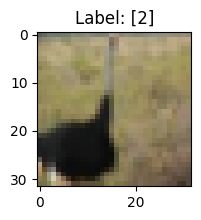

In [4]:
i = 121
plt.figure(figsize=(2,2))
plt.imshow(X_train[i])
plt.title(f"Label: {y_train[i]}")
plt.show()

In [5]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size = 32,
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
 699/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.0996 - loss: 2.3027

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
model.save('model_weights.keras')

In [ ]:
pred_probs = model.predict(X_test[121].reshape(1,32,32,3))

In [ ]:
sample_pred = np.argmax(pred_probs)

In [ ]:
print(sample_pred)